# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


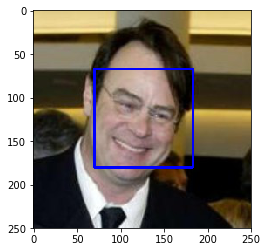

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

n_faces = lambda images: sum([face_detector(img_path) for img_path in images])
print("Number of human faces in 'human_files_short':", n_faces(human_files_short))
print("Number of human faces in 'dog_files_short':", n_faces(dog_files_short))

Number of human faces in 'human_files_short': 98
Number of human faces in 'dog_files_short': 17


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

Number of faces detected: 1


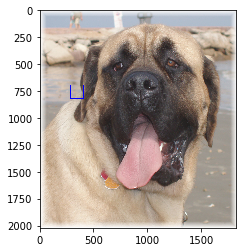

Number of faces detected: 1


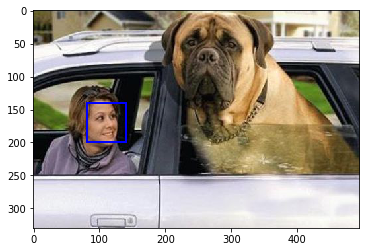

Number of faces detected: 3


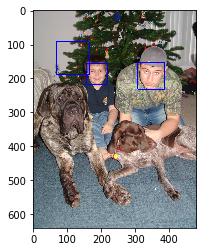

Number of faces detected: 1


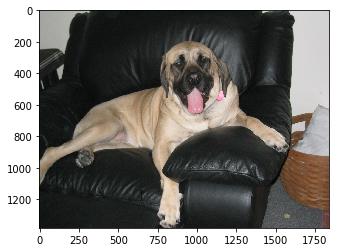

Number of faces detected: 1


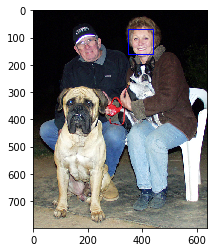

Number of faces detected: 1


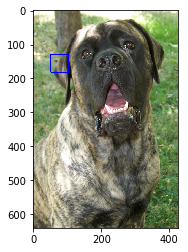

Number of faces detected: 1


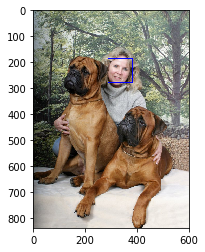

Number of faces detected: 1


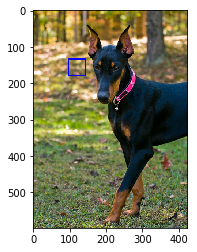

Number of faces detected: 1


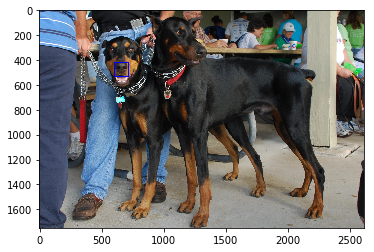

Number of faces detected: 1


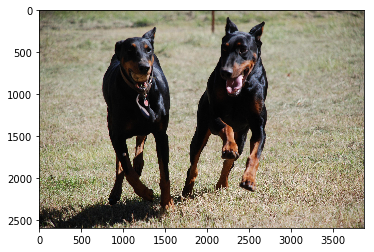

Number of faces detected: 1


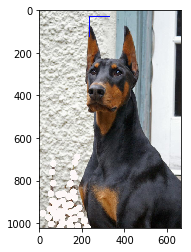

Number of faces detected: 2


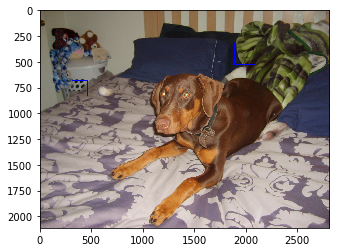

Number of faces detected: 1


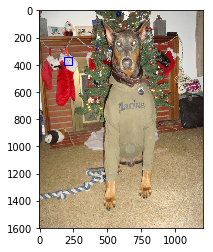

Number of faces detected: 1


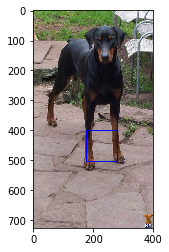

Number of faces detected: 1


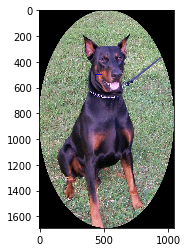

Number of faces detected: 1


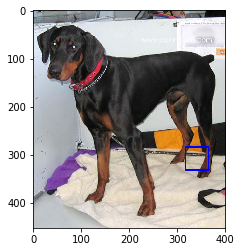

Number of faces detected: 1


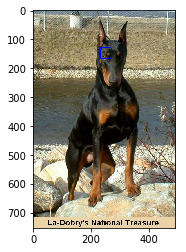

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [5]:
# Observe misclassified images

def show_img_with_detected_face(img_path):
    img = cv2.imread(img_path)
    # convert BGR image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # find faces in image
    faces = face_cascade.detectMultiScale(gray)
    # print number of faces detected in the image
    print('Number of faces detected:', len(faces))
    # get bounding box for each detected face
    for (x,y,w,h) in faces:
        # add bounding box to color image
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # display the image, along with bounding box
    plt.imshow(cv_rgb)
    plt.show()


[show_img_with_detected_face(img_path) for img_path in dog_files_short if face_detector(img_path)]

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:07<00:00, 78062332.19it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  # https://stackoverflow.com/a/23575424

import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    data_transforms = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(),
        normalize
    ])
    img = Image.open(img_path)
    img_tensor = data_transforms(img)
    img_tensor = img_tensor.unsqueeze(0)
    
    VGG16.eval()
    if use_cuda:
        img_tensor = img_tensor.cuda()
    output = VGG16(img_tensor)
    _, pred = torch.max(output, 1)
    return pred[0]


dog_idx = 25
VGG16_predict(dog_files[dog_idx])

tensor(243, device='cuda:0')

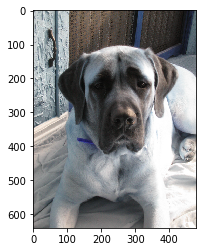

In [8]:
img = cv2.imread(dog_files[dog_idx])
plt.imshow(img)
plt.show()

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path, predictor):
    first_dog_index = 151
    last_dog_index = 268
    predicted = predictor(img_path)
    if use_cuda:
        predicted = predicted.cpu()
    return first_dog_index <= predicted.numpy() <= last_dog_index

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [10]:
def percentage_of_dogs(imgs):
    return sum([dog_detector(img_path, VGG16_predict) for img_path in imgs]) / len(imgs)*100
print("Percentage of images in `human_files_short` with a detected dog:", percentage_of_dogs(human_files_short))
print("Percentage of images in `dog_files_short` with a detected dog:", percentage_of_dogs(dog_files_short))

Percentage of images in `human_files_short` with a detected dog: 2.0
Percentage of images in `dog_files_short` with a detected dog: 97.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
resnet50 = models.resnet50(pretrained=True)
if use_cuda:
    resnet50 = resnet50.cuda()
    
def resnet50_predict(img_path):
    '''
    Use pre-trained Resnet-50 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to the Resnet-50 model's prediction
    '''
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    data_transforms = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(),
        normalize
    ])
    img = Image.open(img_path)
    img_tensor = data_transforms(img)
    img_tensor = img_tensor.unsqueeze(0)
    
    resnet50.eval()
    if use_cuda:
        img_tensor = img_tensor.cuda()
    output = resnet50(img_tensor)
    _, pred = torch.max(output, 1)
    return pred[0] # predicted class index


percentage_of_dogs = lambda imgs: sum([dog_detector(img_path, resnet50_predict) for img_path in imgs]) / len(imgs)*100
print("Percentage of images in `human_files_short` with a detected dog:", percentage_of_dogs(human_files_short))
print("Percentage of images in `dog_files_short` with a detected dog:", percentage_of_dogs(dog_files_short))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 91516035.15it/s]


Percentage of images in `human_files_short` with a detected dog: 1.0
Percentage of images in `dog_files_short` with a detected dog: 97.0


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [12]:
%ls /data/dog_images/train | wc -l

133


In [13]:
### Compute the mean and std values of the training images to see if they are similar to the standard values
### used in the literature.
# from torchvision import datasets
# train_data = datasets.ImageFolder('/data/dog_images/train/', transform=transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
# ]))
# mean=0
# var=0
# n_img=0
# for batch_img, _ in torch.utils.data.DataLoader(train_data, batch_size=128):
#     batch_img = batch_img.view(batch_img.size(0), batch_img.size(1), -1)
#     n_img += batch_img.size(0)
#     mean += batch_img.mean(2).sum(0)
#     var += batch_img.var(2).sum(0)
    
# mean /= n_img
# var /= n_img
# std = torch.sqrt(var)
# print(mean, std)
### tensor([ 0.4864,  0.4560,  0.3918]) tensor([ 0.2363,  0.2316,  0.2307])
### Similar to the values of ImageNet...

In [14]:
import os
from torchvision import datasets

# The batch size was initially set to 256 according to Simonyan and Zisserman (2015): https://arxiv.org/pdf/1409.1556.pdf
# However, the model run out of memory. It was therefore decreased to 128 and then to 64.
batch_size = 64  
standard_means = (0.485, 0.456, 0.406)  # ImageNet normalization values: https://stackoverflow.com/a/58151903
standard_stds = (0.229, 0.224, 0.225)

n_classes = 133

train_transforms = transforms.Compose([
#     transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(standard_means, standard_stds)
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(standard_means, standard_stds)
])


train_data = datasets.ImageFolder('/data/dog_images/train/', transform=train_transforms)
valid_data = datasets.ImageFolder('/data/dog_images/valid/', transform=test_transforms)
test_data = datasets.ImageFolder('/data/dog_images/test/', transform=test_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)
loaders = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?

- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**:

The input size for the network has been set to 224x224, according to the values used in the literature (https://pytorch.org/vision/stable/models.html, https://arxiv.org/pdf/1409.1556.pdf). The process to obtain this dimension in the training set consists of randomly cropping the images and resize them to 224x224. As for the validation and test sets, the code resizes the images to 256x256 and then crops them at their center using a 224x224 square. Furthermore, the code performs a data augmentation step to have rotation and translation invariance in the training dataset. This step consists of a random horizontal flip followed by a random rotation of 15 degrees.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

- Shape = (W_in - F + 2P) / S + 1
  - W_in = the width/height (square) of the previous layer
  - F = Filter size
  - P = Padding
  - S = Stride

In [15]:
shape = lambda w_in, f, p, s: (w_in - f + 2*p) / s + 1
shape(256, 2, 0, 2)

128.0

In [22]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(256, 256, 3, stride=1, padding=1)
        
        self.pool = nn.MaxPool2d(2, stride=2)
        self.dropout = nn.Dropout(p=0.2)
        
        self.fc1 = nn.Linear(256*14*14, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, n_classes)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))  # In 3x224x224  | Out 64x224x224
        x = self.pool(x)           # In 64x224x224 | Out 64x112x112
        x = F.relu(self.conv2(x))  # In 64x112x112 | Out 128x112x112
        x = self.pool(x)           # In 128x112x112 | Out 128x56x56
        x = F.relu(self.conv3(x))  # In 128x56x56  | Out 256x56x56
        x = self.pool(x)           # In 256x56x56   | Out 256x28x28
        x = F.relu(self.conv4(x))  # In 256x28x28   | Out 256x28x28
        x = self.pool(x)           # In 256x28x28   | Out 256x14x14
        x = x.view(-1, 256*14*14)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        return F.log_softmax(self.fc3(x), dim=1)

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

The model architecture was based on the work of [Simonyan and Zisserman (2015)](https://arxiv.org/pdf/1409.1556.pdf) with simplifications to reduce complexity and computation resources since the goal is to obtain at least 10% of accuracy. Particularly, the architecture follows the idea of the authors' ConvNet configuration A (Table 1 of the paper), using up to the third block of convolutional layers. My architecture has 4 convolution and max pooling combinations with 64, 128, 256, and 256 filters. With this layout, the network is able to capture different image features' patterns, starting with 64 filters for simple patterns and scaling to 256 for more complex ones. After these combinations, the network introduces two fully-connected layers, each one followed by a dropout layer aiming at reducing potential overfitting. Finally, the last fully-connected layer takes the output of the the previous layer to predict the image class using a log softmax function. Except for the final layer, all other layers use a ReLu activation function.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [23]:
import torch.optim as optim

criterion_scratch = nn.NLLLoss()
optimizer_scratch = optim.Adam(params=model_scratch.parameters(), lr=0.001)  # Tested LR: 0.01, 0.005, 0.001

loaders_scratch = loaders

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [24]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()  # Avg. loss for the batch
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            loss = criterion(output, target)
            valid_loss += loss.item()

        train_loss /= len(loaders['train'])
        valid_loss /= len(loaders['valid'])
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print("Saving the model...")
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)
    return model

In [25]:
# train the model
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 4.882949 	Validation Loss: 4.861698
Saving the model...
Epoch: 2 	Training Loss: 4.818757 	Validation Loss: 4.693584
Saving the model...
Epoch: 3 	Training Loss: 4.729458 	Validation Loss: 4.603163
Saving the model...
Epoch: 4 	Training Loss: 4.680532 	Validation Loss: 4.544309
Saving the model...
Epoch: 5 	Training Loss: 4.635498 	Validation Loss: 4.510644
Saving the model...
Epoch: 6 	Training Loss: 4.563886 	Validation Loss: 4.352550
Saving the model...
Epoch: 7 	Training Loss: 4.460347 	Validation Loss: 4.293403
Saving the model...
Epoch: 8 	Training Loss: 4.405546 	Validation Loss: 4.230939
Saving the model...
Epoch: 9 	Training Loss: 4.345115 	Validation Loss: 4.132090
Saving the model...
Epoch: 10 	Training Loss: 4.267575 	Validation Loss: 4.058528
Saving the model...
Epoch: 11 	Training Loss: 4.217086 	Validation Loss: 4.057011
Saving the model...
Epoch: 12 	Training Loss: 4.155466 	Validation Loss: 3.875173
Saving the model...
Epoch: 13 	Training Loss:

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [26]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))


def test(loaders, model, criterion, use_cuda, use_log=False):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss += loss.item()
        # convert output probabilities to predicted class
        if use_log:
            output = torch.exp(output)
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
    
    test_loss /= len(loaders['test'])
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda, use_log=True)

Test Loss: 3.296368


Test Accuracy: 17% (148/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [34]:
loaders_transfer = loaders

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [27]:
import torchvision.models as models
import torch.nn as nn

model_transfer = models.vgg16(pretrained=True)
if use_cuda:
    model_transfer = model_transfer.cuda()
    
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [28]:
for param in model_transfer.parameters():
    param.requires_grad = False
    
model_transfer.classifier[6] = nn.Linear(model_transfer.classifier[6].in_features, n_classes)
if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

For transfer learning, I've decided to use the VGGNet as a feature extractor. The selection has been driven by its well-reported performance on the ImageNet dataset. Since the dog breed dataset can be considered as a subset of ImageNet, the goal is to fix the feature extractor weights and then train a classifier composed of fully-connected layers on top of that. Finally, the output of the network is modified to match the number of dog breeds to classify.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [30]:
criterion_transfer = torch.nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier[6].parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [35]:
n_epochs = 10
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 2.046710 	Validation Loss: 0.548999
Saving the model...
Epoch: 2 	Training Loss: 1.287284 	Validation Loss: 0.516406
Saving the model...
Epoch: 3 	Training Loss: 1.206579 	Validation Loss: 0.525460
Epoch: 4 	Training Loss: 1.193579 	Validation Loss: 0.447463
Saving the model...
Epoch: 5 	Training Loss: 1.156418 	Validation Loss: 0.496118
Epoch: 6 	Training Loss: 1.147076 	Validation Loss: 0.447237
Saving the model...
Epoch: 7 	Training Loss: 1.185267 	Validation Loss: 0.514452
Epoch: 8 	Training Loss: 1.162151 	Validation Loss: 0.431844
Saving the model...
Epoch: 9 	Training Loss: 1.153333 	Validation Loss: 0.520407
Epoch: 10 	Training Loss: 1.106301 	Validation Loss: 0.472363


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [36]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.533141


Test Accuracy: 84% (704/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [74]:
class_names = [item[4:].replace("_", " ") for item in train_data.classes]


def predict_breed_transfer(img_path):
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
    img = Image.open(img_path)
    img_tensor = transform(img).unsqueeze(0)
    if use_cuda:
        img_tensor = img_tensor.cuda()
    model_transfer.eval()
    model_output = model_transfer(img_tensor)
    _, pred = torch.max(model_output, dim=1)
    return class_names[pred[0]] if pred[0] < len(class_names) else "Error: Prediction out of range"

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [75]:
def run_app(img_path):
    pred = predict_breed_transfer(img_path)
    if dog_detector(img_path, VGG16_predict) and not pred.startswith("Error"):
        print(f"Hey! This dog looks like a {pred}.")
    elif face_detector(img_path) and not pred.startswith("Error"):
        print(f"Hey! That human face looks like a {pred}!")
    else:
        print("The model failed to detect human or dog faces in that image." +
              "Please make sure you are using an image of a human or a dog.")
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

For this small test, the model correctly predicted the dogs breed. Also, in photos where the dog was a mongrel, the model returned a breed with similar features. It was fun to see the predictions on human faces, trying to understand, through a closer and thorough look, the features that influenced the decision.

Possible improvements:
- Model training with more epochs (it was observed that the model could have continued enhancing if I'd let it run for more epochs);
- Perform transfer learning with, say, 5 state-of-the-art algorithms and pick the one with the best validation accuracy;
- Return the top 3 predicted breeds with their probabilities to analyse the classification confidence. Furthermore, this could be useful to better classify mixed-breed dogs.

Hey! That human face looks like a Beagle!


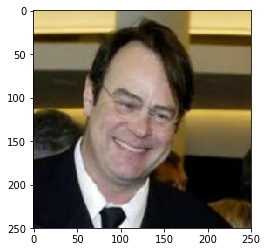

Hey! That human face looks like a Bearded collie!


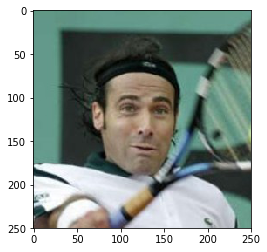

Hey! That human face looks like a Australian shepherd!


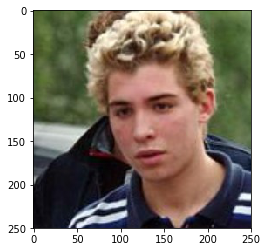

Hey! This dog looks like a Bullmastiff.


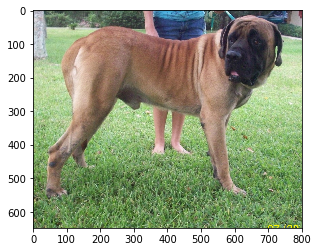

Hey! This dog looks like a Bullmastiff.


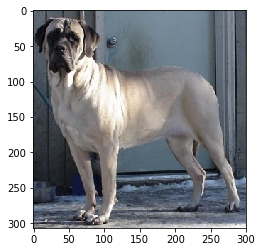

Hey! This dog looks like a Bullmastiff.


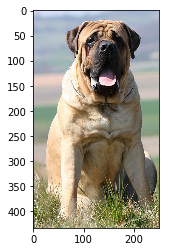

In [76]:
# Example images
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

Hey! This dog looks like a Italian greyhound.


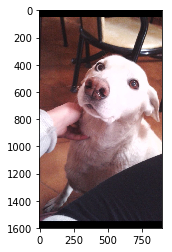

Hey! That human face looks like a Silky terrier!


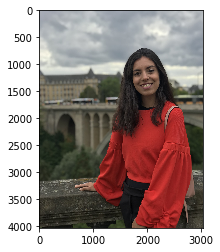

Hey! This dog looks like a German shepherd dog.


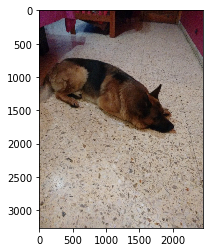

Hey! That human face looks like a Pharaoh hound!


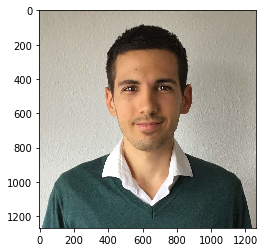

Hey! This dog looks like a Cavalier king charles spaniel.


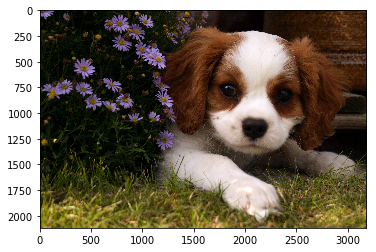

Hey! This dog looks like a Golden retriever.


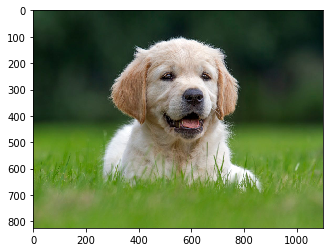

In [79]:
custom_pics = np.array(glob("./custom_images/*"))


for file in custom_pics:
    run_app(file)